In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

## minimizing a function

In [2]:
from scipy.optimize import minimize

In [23]:
def f(x):
    return (x - 3)**2

res=minimize(f,x0=2)
res.x

array([2.99999999])

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>&#x2212;</mo>
  <mn>2.5</mn>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>x</mi>
  <mo>&#x2212;</mo>
  <mn>2</mn>
  <mi>y</mi>
  <mo>+</mo>
  <mn>2</mn>
  <mo>&#x2265;</mo>
  <mn>0</mn>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mo>&#x2212;</mo>
  <mi>x</mi>
  <mo>&#x2212;</mo>
  <mn>2</mn>
  <mi>y</mi>
  <mo>+</mo>
  <mn>6</mn>
  <mo>&#x2265;</mo>
  <mn>0</mn>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mo>&#x2212;</mo>
  <mi>x</mi>
  <mo>+</mo>
  <mn>2</mn>
  <mi>y</mi>
  <mo>+</mo>
  <mn>2</mn>
  <mo>&#x2265;</mo>
  <mn>0</mn>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>x</mi>
  <mo>&#x2265;</mo>
  <mn>0</mn>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>&#x2265;</mo>
  <mn>0</mn>
</math>

In [25]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)
res.x

array([1.4, 1.7])

## interpolate

this predicts the middle value for y in y=f(x). like here have 10 values of x and y, using this function we give it 100 values instead of 10 then it predicts more y based on the already given 10 values

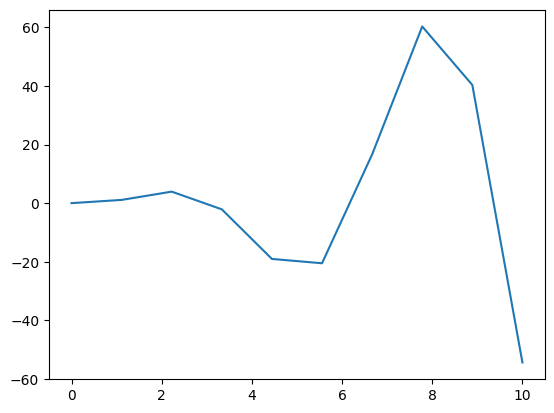

In [5]:
x = np.linspace(0, 10, 10)
y = x**2*np.sin(x)
plt.plot(x,y)

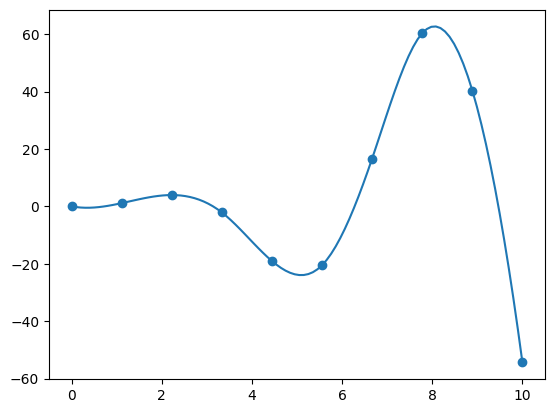

In [6]:
from scipy.interpolate import interp1d
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

## curve fitting

this predicts the coefficients of a functions, atleast in this example

In [7]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

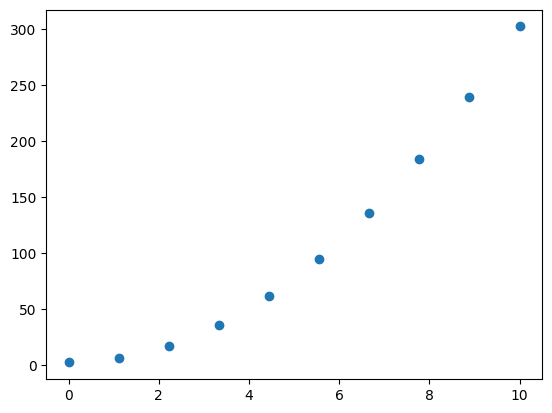

In [8]:
plt.scatter(x_data, y_data)

in this example it takes y_data as a function and tries to fit it into func, by manipulating a and b, popt is the values of a,b . pcov is the erorr or something 

In [9]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))

now we use y=Acos(wt+ phi), as the func and we will take a data of a pendulum to predict the A and w and phi

In [10]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

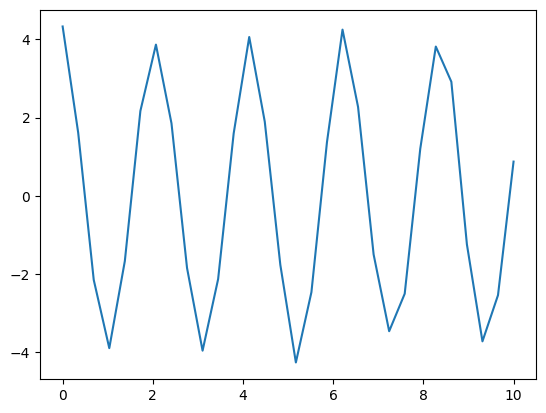

In [11]:
plt.plot(t_data,y_data)

In [12]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))  # if your initial guess is very bad, you might not get the most accurate sol.
A , w , phi = popt
print(A,w,phi)

3.9483621855536106 2.9989952081518423 0.10411349717212343


checking the values

In [13]:
x_check=np.linspace(0,10,100)
y_check=func(x_check,A,w,phi)

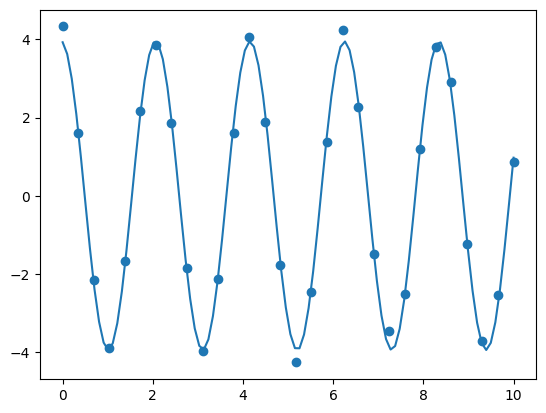

In [14]:
plt.scatter(t_data,y_data)
plt.plot(x_check,y_check)

## differentiation

scipy doesn't do differentiations right now

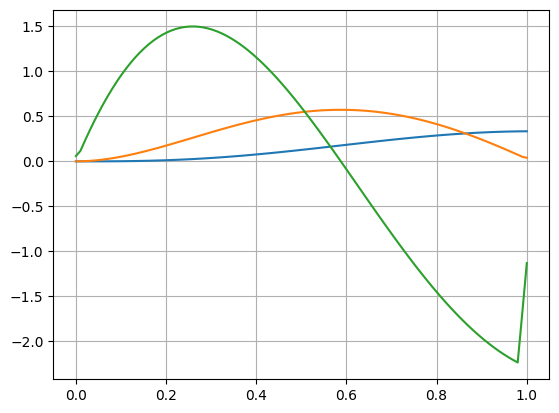

In [15]:

def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)
y=f(x)
dydx=np.gradient(y,x)
dy2dx=np.gradient(dydx,x)
plt.plot(x, y)
plt.plot(x,dydx)
plt.plot(x,dy2dx)
plt.grid()

## Integration

In [16]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)
integral

0.14558175869954834

In [17]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)
integral

0.590090324408853

## Differential Equations

first order ode

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>v</mi>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msup>
  <mo>&#x2212;</mo>
  <mi>&#x3B1;</mi>
  <msup>
    <mi>v</mi>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <mi>&#x3B2;</mi>
  <mo>=</mo>
  <mn>0</mn>
  <mspace width="10mm"></mspace>
  <mi>v</mi>
  <mo stretchy="false">(</mo>
  <mn>0</mn>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>0</mn>
</math>

In [18]:
from scipy.integrate import odeint

rearranging the diff eq

In [19]:
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0

In [41]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [21]:
v_sol = sol.T[0]

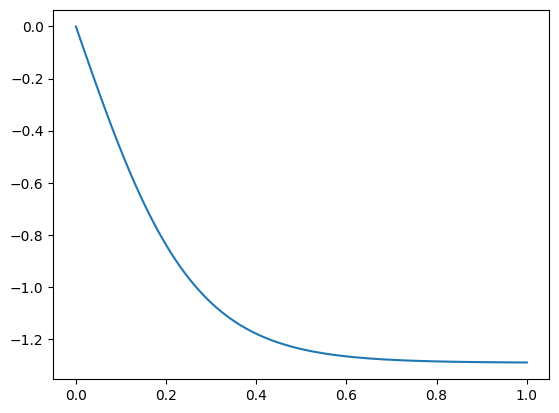

In [22]:
plt.plot(t, v_sol)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msubsup>
    <mi>y</mi>
    <mn>1</mn>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msubsup>
  <mo>=</mo>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo>+</mo>
  <msubsup>
    <mi>y</mi>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
  <mo>+</mo>
  <mn>3</mn>
  <mi>x</mi>
  <mspace width="10mm"></mspace>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo stretchy="false">(</mo>
  <mn>0</mn>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>0</mn>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msubsup>
    <mi>y</mi>
    <mn>2</mn>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msubsup>
  <mo>=</mo>
  <mn>3</mn>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo>+</mo>
  <msubsup>
    <mi>y</mi>
    <mn>2</mn>
    <mn>3</mn>
  </msubsup>
  <mo>&#x2212;</mo>
  <mi>cos</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mspace width="10mm"></mspace>
  <msub>
    <mi>y</mi>
    <mn>2</mn>
  </msub>
  <mo stretchy="false">(</mo>
  <mn>0</mn>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>0</mn>
</math>

Letting 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>S</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>y</mi>
    <mn>2</mn>
  </msub>
  <mo stretchy="false">)</mo>
</math>
 we need to write a function that returns <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>d</mi>
  <mi>S</mi>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>d</mi>
  <mi>x</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <mi>d</mi>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>d</mi>
  <mi>x</mi>
  <mo>,</mo>
  <mi>d</mi>
  <msub>
    <mi>y</mi>
    <mn>2</mn>
  </msub>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>d</mi>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>
The function
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>d</mi>
  <mi>S</mi>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>d</mi>
  <mi>x</mi>
</math>
can take in 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>S</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>y</mi>
    <mn>2</mn>
  </msub>
  <mo stretchy="false">)</mo>
</math>

In [30]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [36]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [32]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

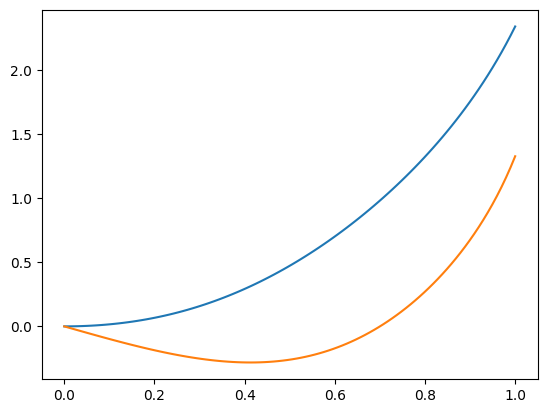

In [33]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)